In [2]:
import meshplot as mp 
import igl 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import os
import shapely
from shapely.geometry import Point
from shapely.geometry import Polygon, mapping
from shapely.geometry.polygon import Polygon
import sympy
#from sympy import Point,Line#,Polygon


**Defining the 3d cylindrical mesh**

N = Number of unit meshes along a radii
r = splitting N radiis of OD - ID (43-18)
thetasteps = number of lines split among 360 degree 
z_steps= number of depth elements in z 
z= Depth elements devided for 60mm 
nodes= contains all cordinates required for the mesh 
e_list= contains 8 tuple nodes defining a rectangular mesh 

In [3]:
N= 17
IR=15
OR=50
r= np.linspace(IR, OR, N)
thetasteps= 72
dt=2*np.pi/thetasteps
theta=  np.linspace(0, 2*np.pi-dt, thetasteps)

z_steps= 21
z=np.linspace(0,60,z_steps)

z_count=1
count=1

nodes=[]
rubber=[]
metal=[]

for i in range(z_steps):
    for j in range(N):
        for k in range(thetasteps):
            nodes.append([count,
                                r[j]*np.cos(theta[k]),
                                r[j]*np.sin(theta[k]),
                                z[i]])
            count=count+1
               

e_list=[]
            

for m in range(0,z_steps-1):
    lis=np.arange(1+m*thetasteps*N,(m+1)*thetasteps*N-thetasteps+1,1)
    #print(len(lis),lis)
    for g in range(len(lis)):
        if lis[g]%thetasteps==0:
            #print(lis[g])
            n= int(lis[g]/thetasteps)
            e_list.append([z_count, 
                                lis[g], 
                                (lis[g]+1)%thetasteps +(n-1)*thetasteps, 
                                (lis[g]+thetasteps+1)%thetasteps+n*thetasteps, 
                                lis[g]+thetasteps,
                                lis[g]+ (N*thetasteps), 
                                (lis[g]+1)%thetasteps +(n-1)*thetasteps+ (N*thetasteps),
                                (lis[g]+thetasteps+1)%thetasteps+n*thetasteps+ (N*thetasteps), 
                                lis[g]+thetasteps + (N*thetasteps)])

        else:
            e_list.append([z_count, 
                                lis[g], 
                                (lis[g]+1), 
                                (lis[g]+thetasteps+1), 
                                lis[g]+thetasteps,
                                lis[g]+ (N*thetasteps), 
                                (lis[g]+1)+ (N*thetasteps),
                                (lis[g]+thetasteps+1)+ (N*thetasteps), 
                                lis[g]+thetasteps + (N*thetasteps)])
        z_count=z_count+1

#print(r)
        
#print(e_list) 




In [4]:

ele=np.zeros(shape=(len(e_list),5,2))

for i in range(len(e_list)):
    ele[i]=[[nodes[e_list[i][1]-1][1],nodes[e_list[i][1]-1][2]],
              [nodes[e_list[i][2]-1][1],nodes[e_list[i][2]-1][2]],
              [nodes[e_list[i][3]-1][1],nodes[e_list[i][3]-1][2]],
              [nodes[e_list[i][4]-1][1],nodes[e_list[i][4]-1][2]],
              [nodes[e_list[i][1]-1][1],nodes[e_list[i][1]-1][2]]]

**Metal area defined**
Deafult configuration where the outermost radiie consist of metal 

- relevant metal node numbers are appended to a list 'metal'

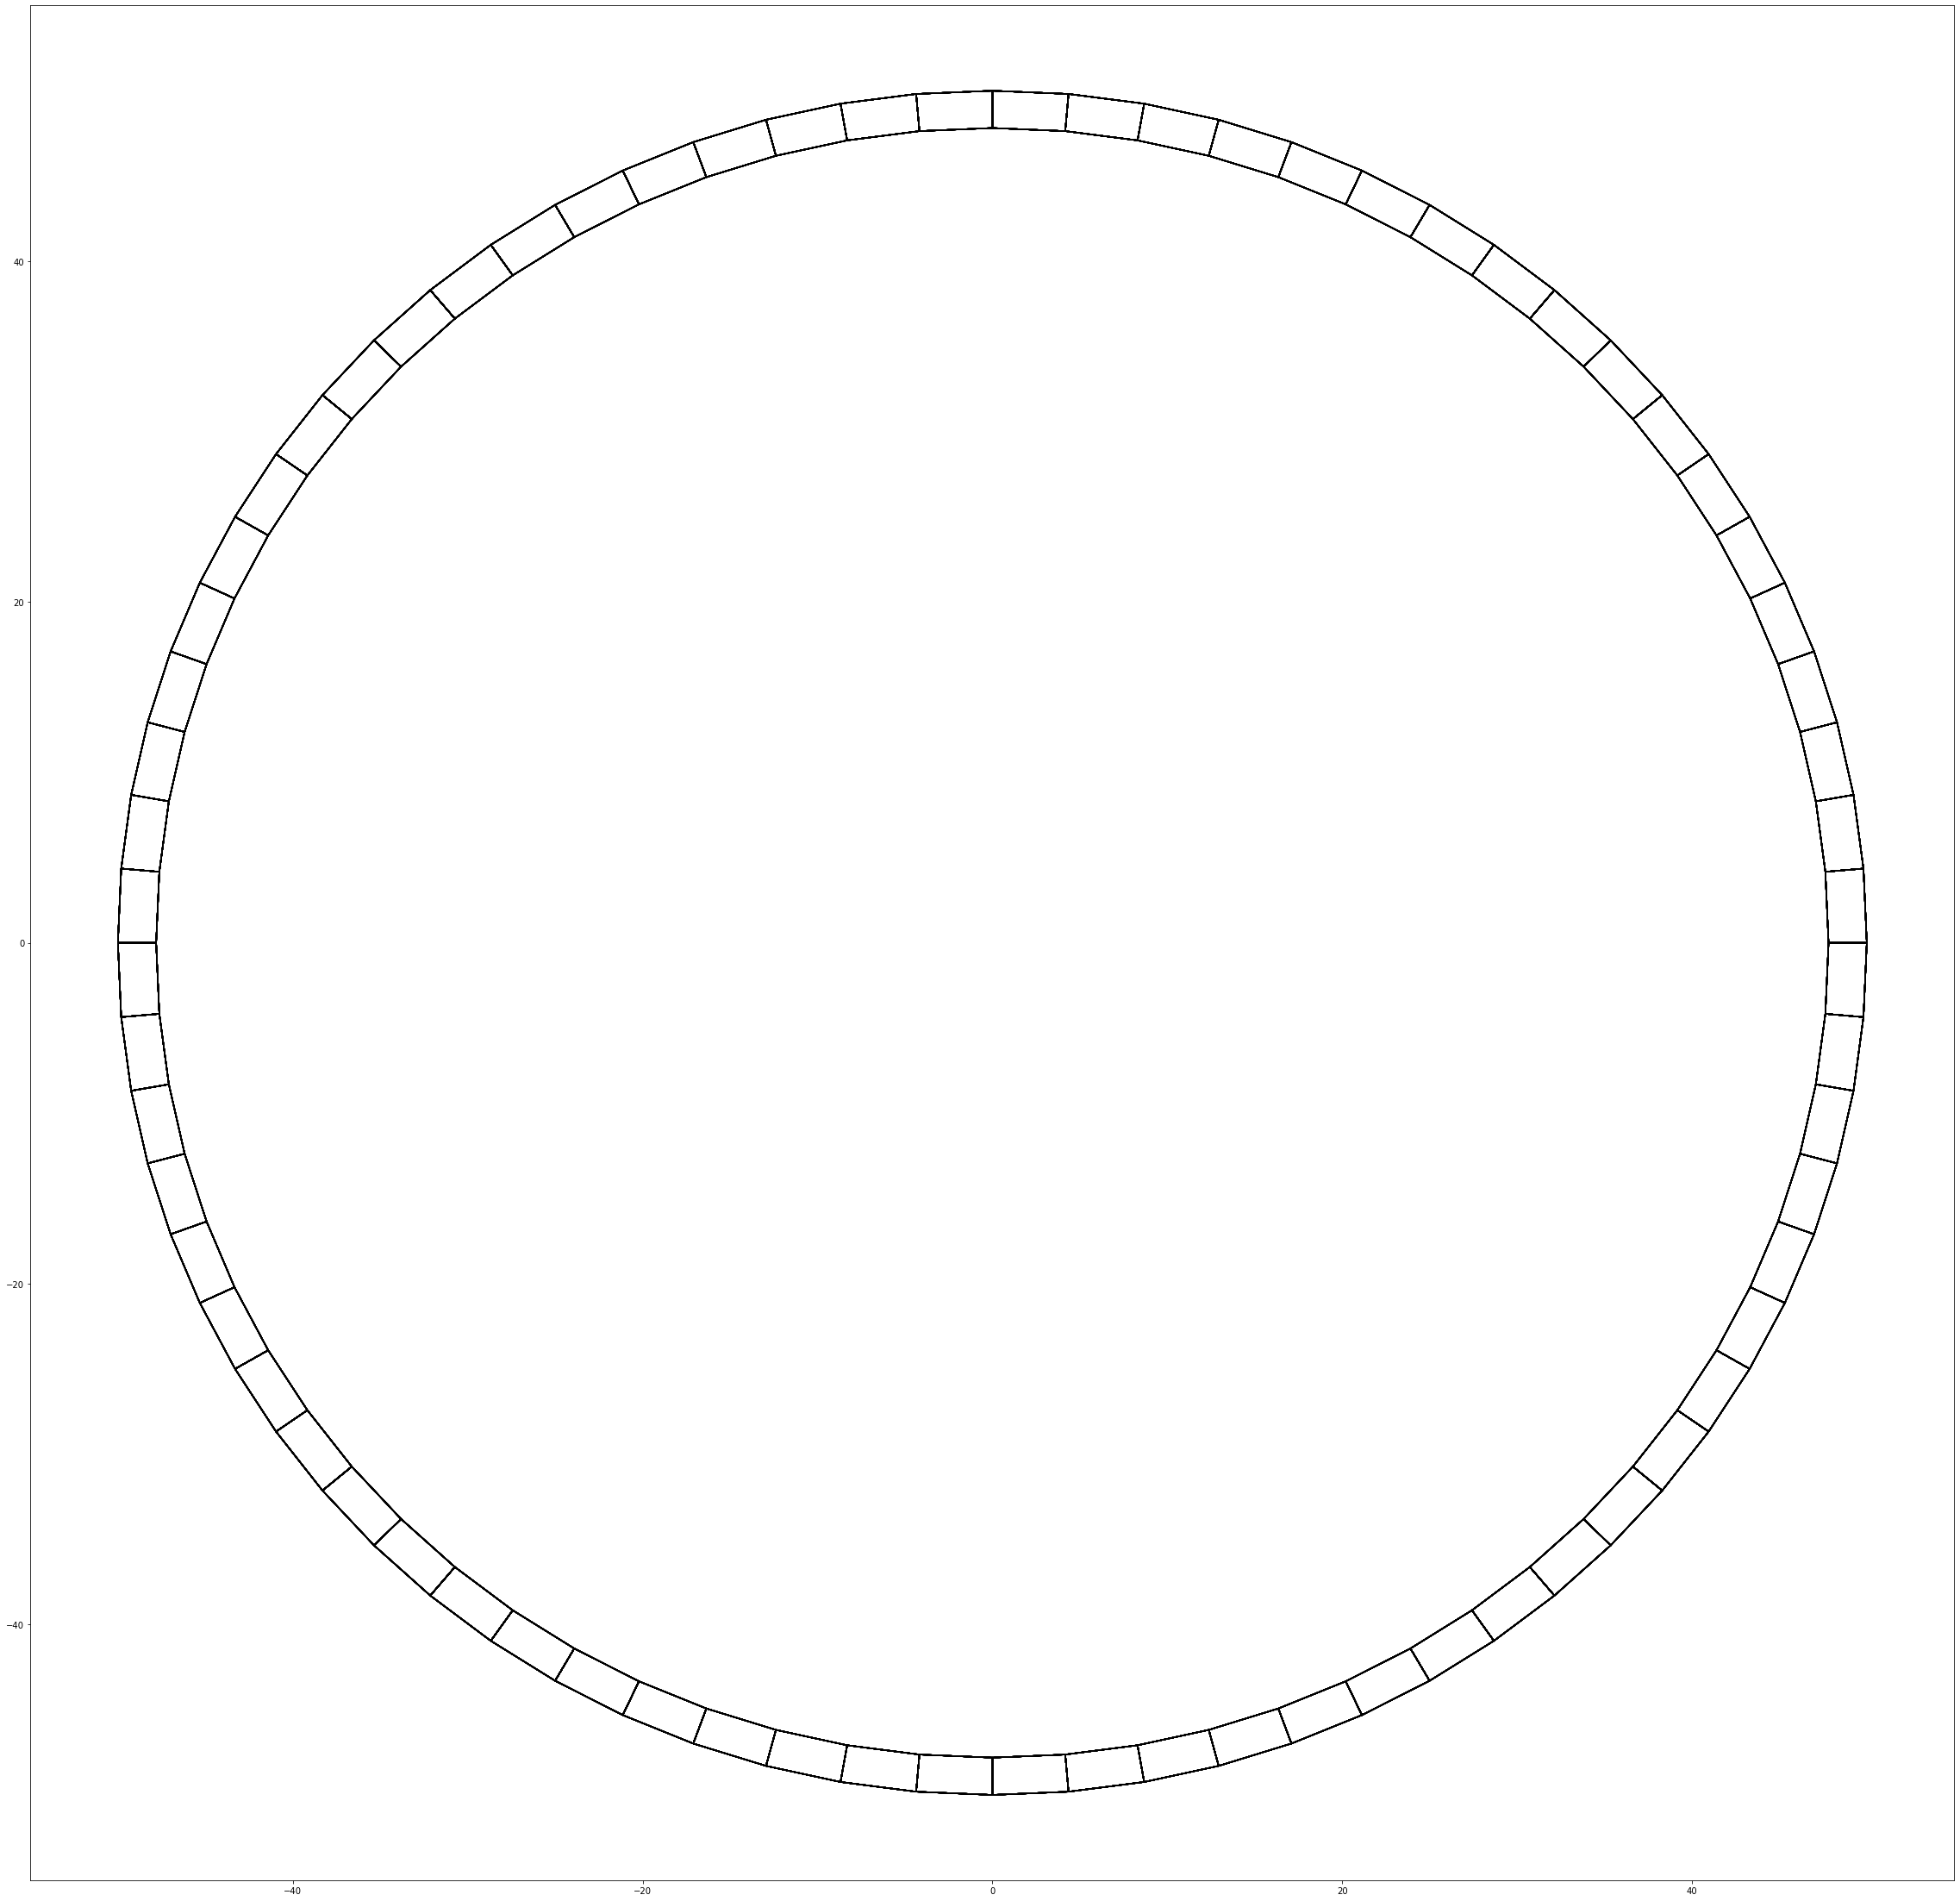

In [5]:


def polar1(x, y):
    rads = (x ** 2 + y ** 2) ** .5
    theta_1 = math.degrees(math.atan2(y,x))
    theta_1 = (theta_1 + 360) % 360
    return round(rads,1), round(theta_1,2)


for i in range(len(ele)):
    counter=0
    counter1=0
    for j in range(4):
        radius,angle=(polar1(ele[i][j][0],ele[i][j][1]))
        if(round(radius,1)>=round(r[-2],1)
           and round(radius,1) <= round(r[-1],1) 
           and round((angle),1) >= round(math.degrees(theta[0]),1) 
           and round((angle),1) <= round(math.degrees(theta[-1]),1)):
            counter=counter+1
        if(counter==4):
            rx,ry=zip(*ele[i])
            metal.append(i)
            plt.plot(rx,ry,color='black')
                    
            
plt.show()

**The type of insert is mentioned # 1= Diamond, 2= Bezier diamond, 3= Ring, 4= square/rectangular insert** 

- **Diamond** - lx,by (points- (lx/2,0),(-l/2,0),(0,by/2),(0,-b/2)) 
- **Bezier diamond** - lx,by,r,theta (x,y)  (points- (points- (lx/2,0),(x,y),(0,by/2),(-x,y),(-l/2,0),(-x,-y),(0,-b/2),(x,-y)))
- **Ring** - r
- **Rectange** - lx,by (points- points- ((lx/2,by/2),(-lx/2,by/2),(-lx/2,-by/2),(lx/2,-by/2))

25.9375


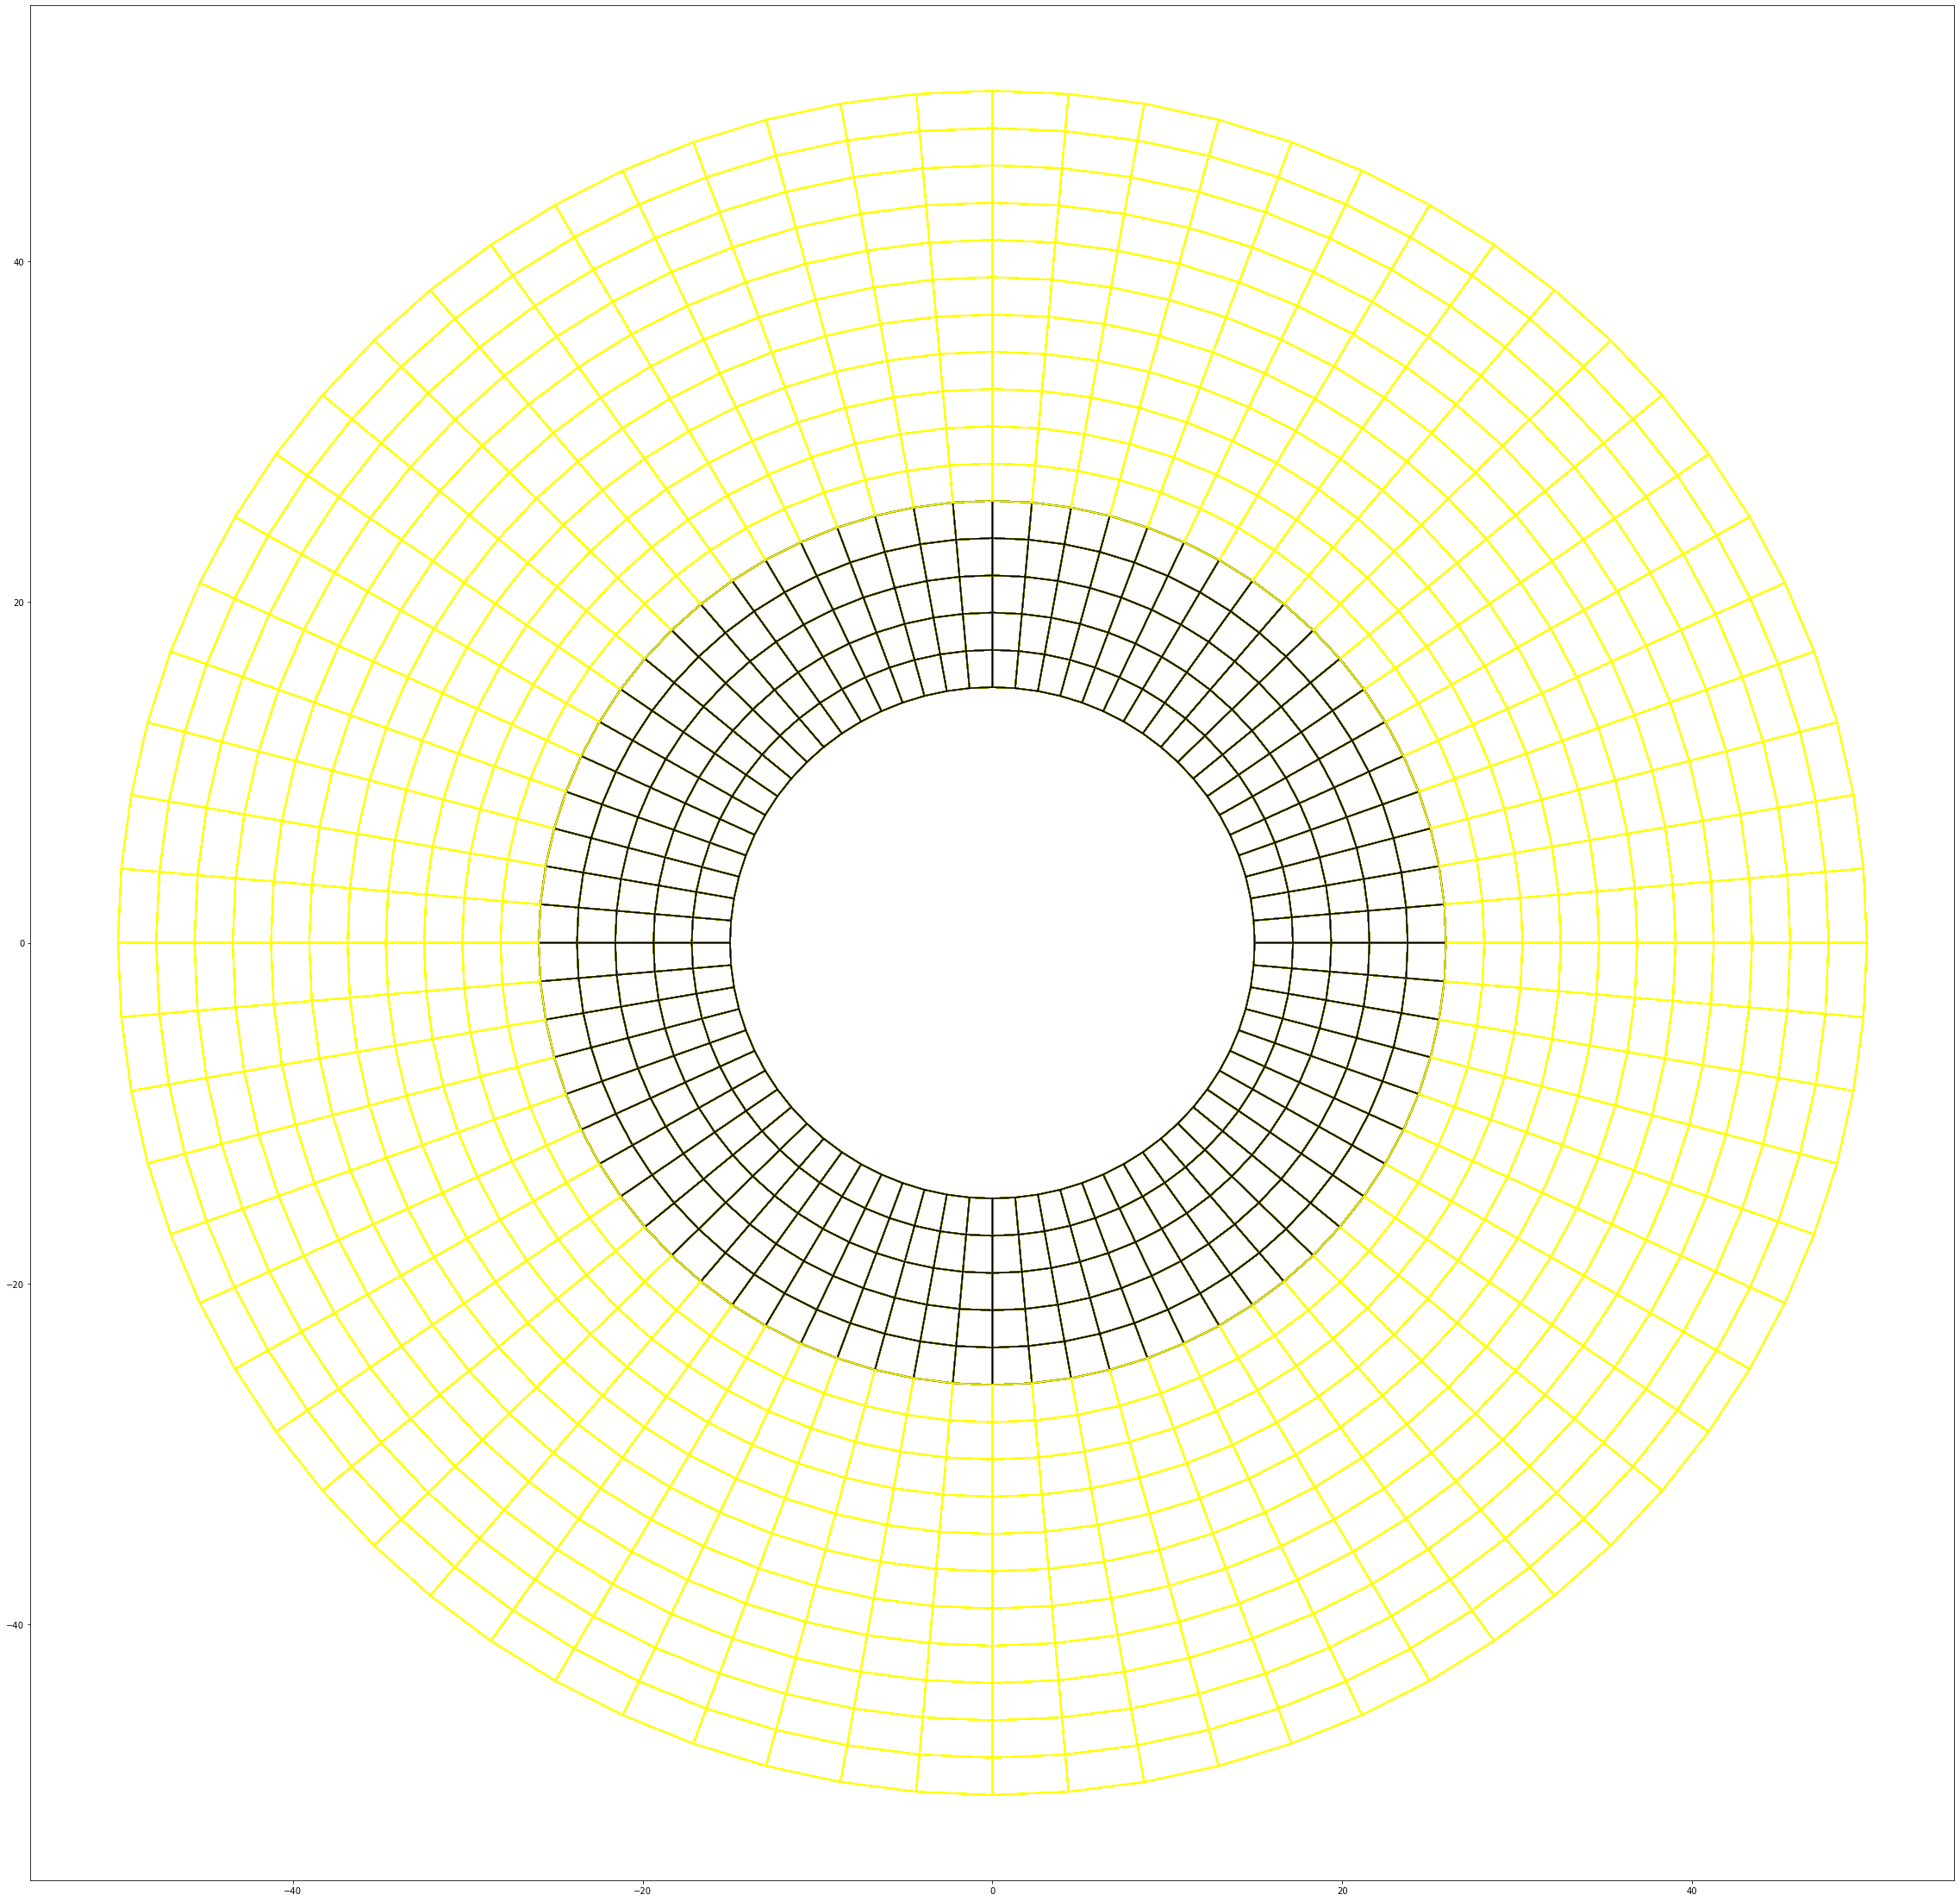

In [6]:

rad_val = 5

print(r[rad_val])

for i in range(len(ele)):
    counter=0
    xs,ys=zip(*ele[i])
    plt.plot(xs,ys,color='yellow')

    #if(i not in metal):
    for j in range(4):
        radius,angle=(polar1(ele[i][j][0],ele[i][j][1]))
        if(round(radius,1)>=round(r[0],1) and 
           round(radius,1) <= round(r[rad_val],1) and 
           round((angle),1) >= round(math.degrees(theta[0]),1) and
           round((angle),1) <= round(math.degrees(theta[-1]),1)):
            counter=counter+1
        if(counter==4):            
            ax,ay=zip(*ele[i])
            metal.append(i)

**Parameter defenitions**  8 parameters [IRp1,r1,θ1,ORp1,IRp2,r2,θ2,ORp2] 


- IRp1 = [0-16]
-IRp2 = [0-16]
-r1 =  [0-16]
-θ1 = [0-90]
-ORp1 = [0-16]
-ORp2 = [0-16]
-r2 =  [0-16]
-θ2 = [0-90]


[[58.263007856148015, 29.24390206326283]]
[[38.263007856148015, 29.24390206326283]]


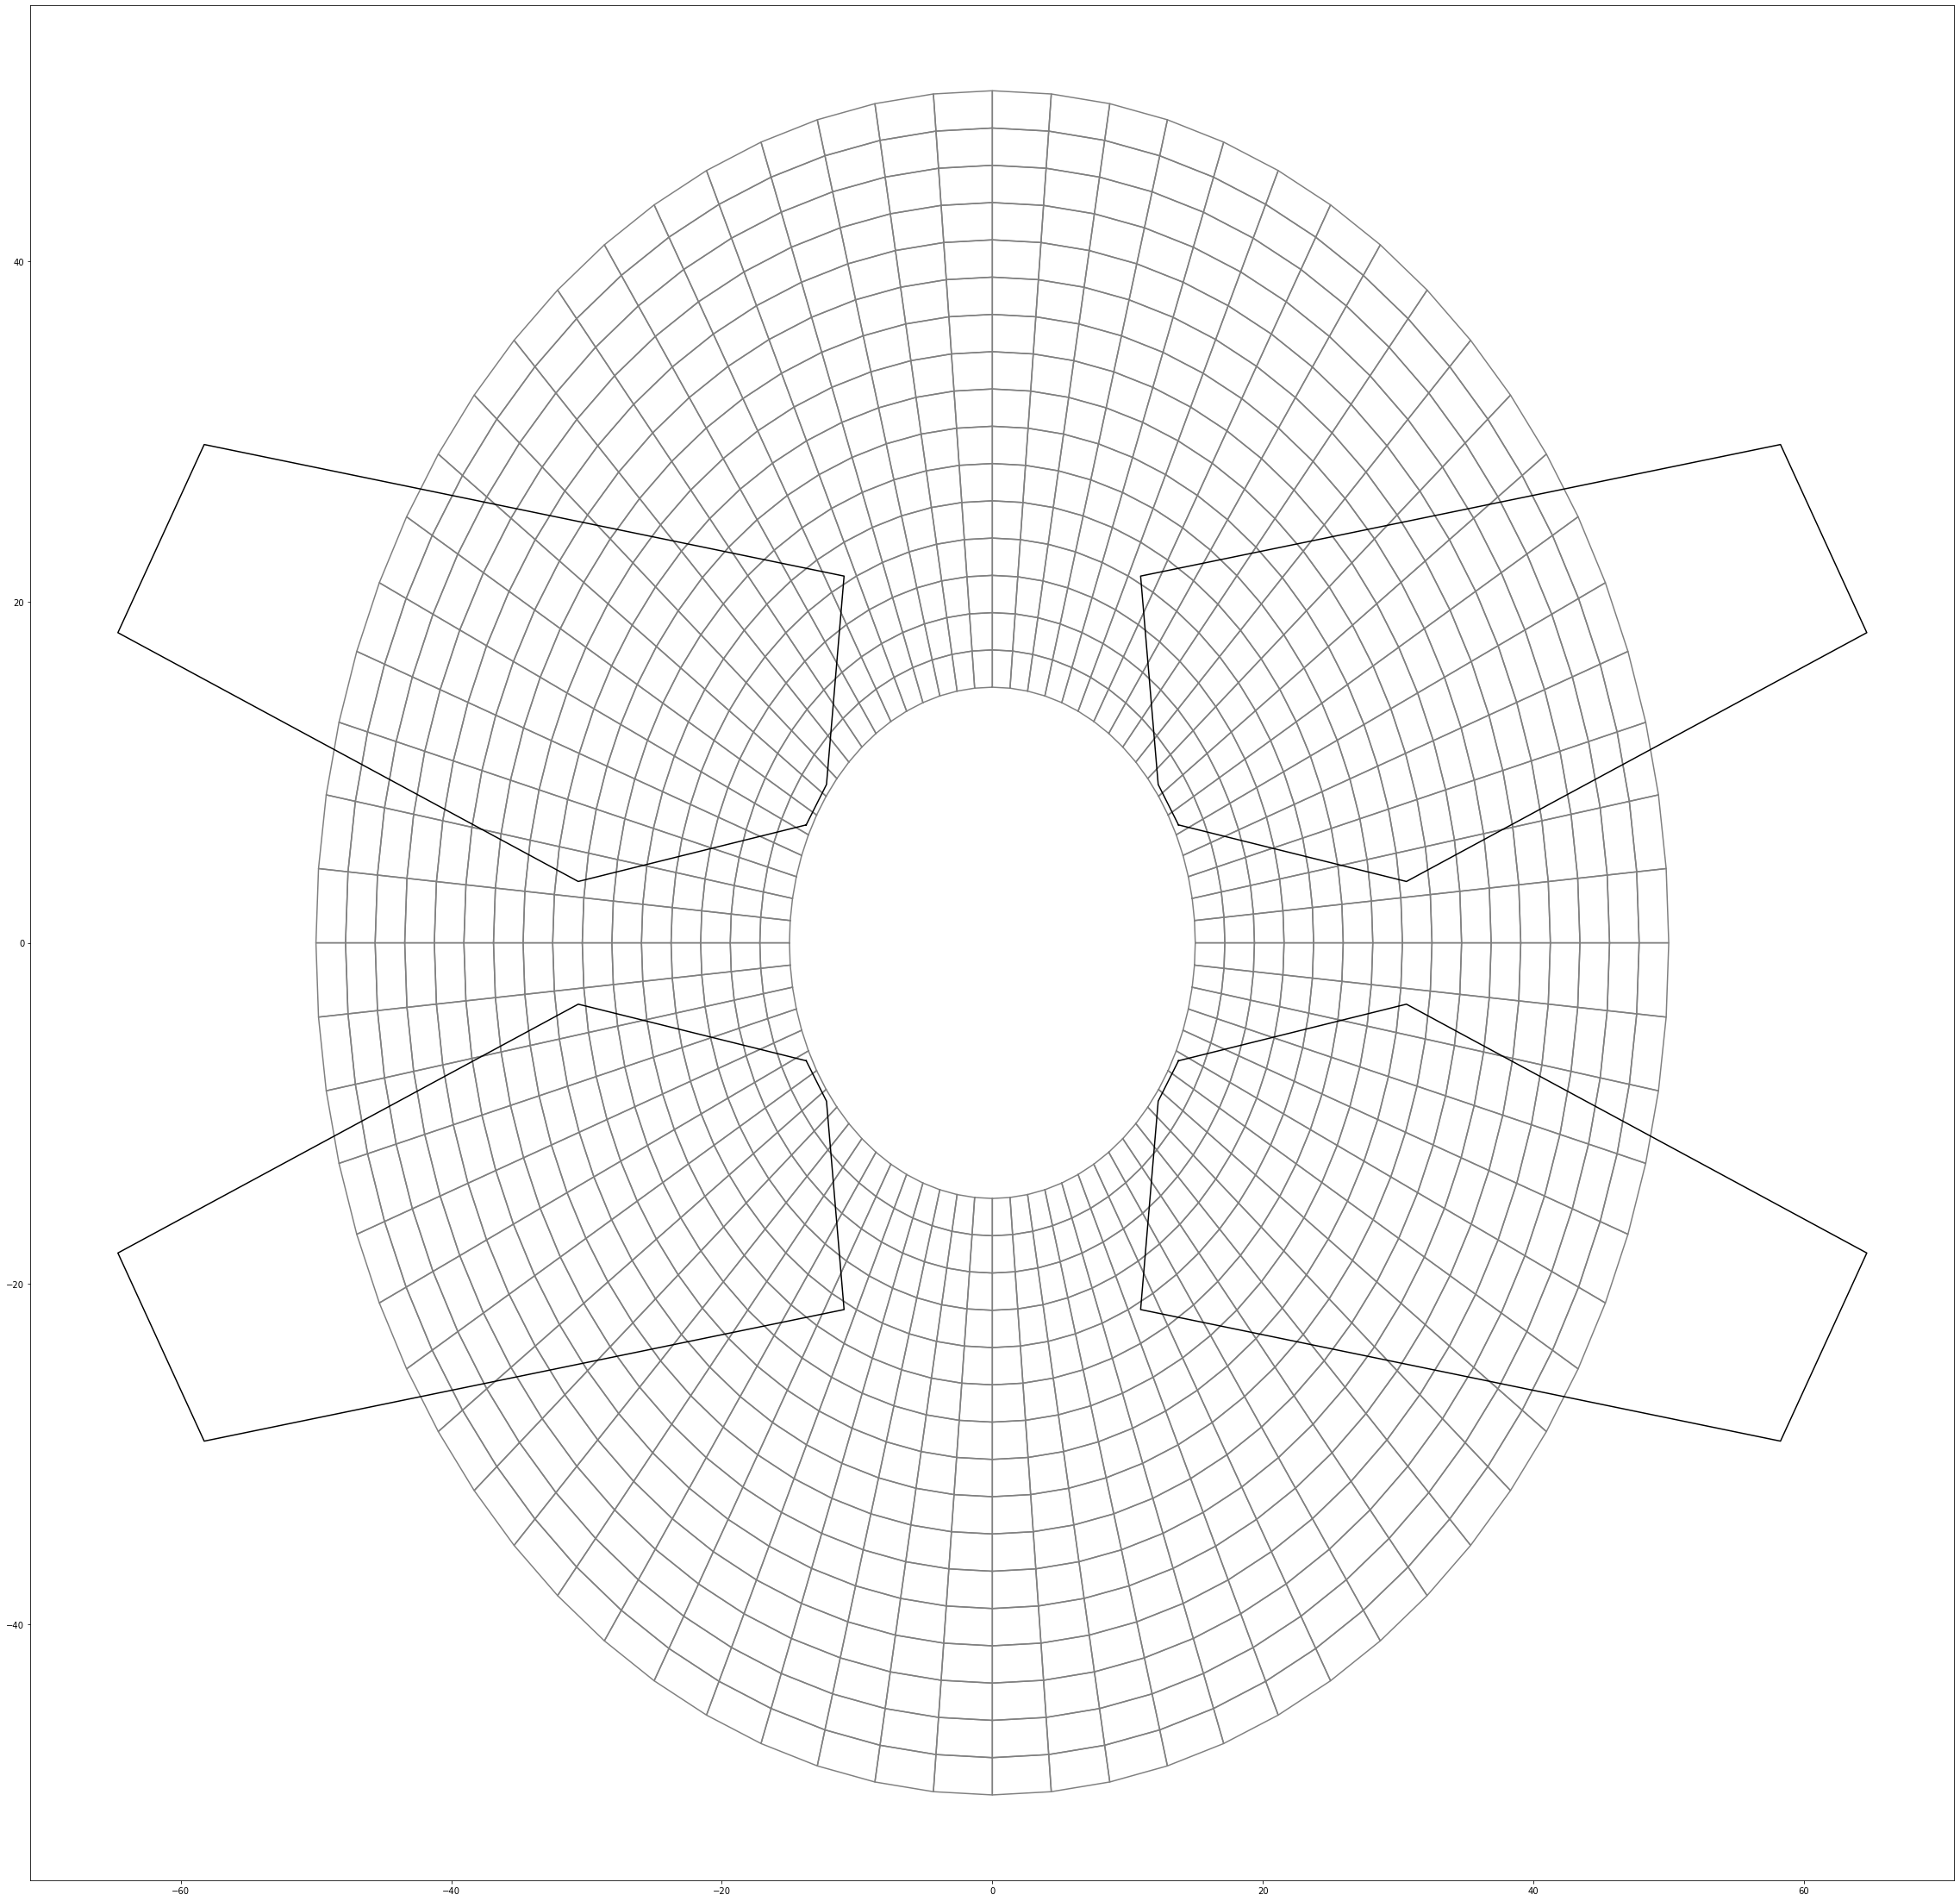

(65.1903665607985, 26.653408689583387) (67.15319322031365, 15.723145923547065)


In [38]:
#%matplotlib

def pol2cart(rho, phi):
    x = rho * np.cos(math.radians(phi))
    y = rho * np.sin(math.radians(phi))
    return([x, y])


r1=r[2]
r2=r[14]
theta1=math.degrees(theta[0])
theta2=math.degrees(theta[10])


cordinate_list=[]

xs=[]
ys=[]
count=0

#visualizing just the first quadrant elements 
for i in range((N-1)*thetasteps):
    counter=0
    for j in range(4):
        #if(ele[i][j][0]>0 and ele[i][j][1]>0):
            #a.append(ele[i][j][0])
            #b.append(ele[i][j][1])
        counter=counter+1
        if(counter==4):
            xs,ys=zip(*ele[i])
            plt.plot(xs,ys,color='gray')
            x_avg=xs[0]+xs[1]+xs[2]+xs[3]
            y_avg=ys[0]+ys[1]+ys[2]+ys[3]
            #if(count<(17*16)):
            #plt.text((x_avg/4)-0.5,(y_avg/4)-0.5,str(count),fontsize=35)
            cordinate_list.append(([(x_avg/4)-0.5,(y_avg/4)-0.5]))
            #count=count+1


parameter=[5,5,60,4,7,8,5,7]

# for 1st being line 
polygon_list=[]

polygon_list.append([cordinate_list[parameter[0]]]) #irp1
polygon_list.append([cordinate_list[parameter[4]]])  #irp2
polygon_list.append([cordinate_list[int(thetasteps*(parameter[1]-1)+parameter[2]/(360/thetasteps))]])  #r1, theta1
polygon_list.append([[[cordinate_list[(N-2)*thetasteps+parameter[7]]][0][0]+20,[cordinate_list[(N-2)*thetasteps+parameter[7]]][0][1]]]) #orp2
polygon_list.append([[[cordinate_list[(N-2)*thetasteps+parameter[3]]][0][0]+20,[cordinate_list[(N-2)*thetasteps+parameter[3]]][0][1]]]) #orp1
polygon_list.append([cordinate_list[int(thetasteps*(parameter[5]-1)+parameter[6]/(360/thetasteps))]])  #r2, theta2
#print(polygon_list)
polygon_list.append(polygon_list[0])


polygon1=[]
polygon2=[]
polygon3=[]
polygon4=[]

for x in polygon_list:
    polygon1.append((round(x[0][0],2),round(x[0][1],2)))
    polygon2.append((round(-x[0][0],2),round(x[0][1],2)))
    polygon3.append((round(-x[0][0],2),round(-x[0][1],2)))
    polygon4.append((round(x[0][0],2),round(-x[0][1],2)))


polygon1 = Polygon(polygon1)
polygon2 = Polygon(polygon2)
polygon3 = Polygon(polygon3)
polygon4 = Polygon(polygon4)





In [44]:




for i in range(len(ele)):
    p1_counter=p2_counter=p3_counter=p4_counter=0
    for j in range(4):
        if(i in metal):
            pass
        else:
            if(polygon1.contains(Point(ele[i][j][0], ele[i][j][1]))): 
                p1_counter=p1_counter+1

                if(p1_counter==2):
                    #xs,ys=zip(*ele[i])
                    #plt.plot(xs,ys,color='magenta')
                    rubber.append(i)
            if(polygon2.contains(Point(ele[i][j][0], ele[i][j][1]))): 
                p2_counter=p2_counter+1

                if(p2_counter==2):
                    #xs,ys=zip(*ele[i])
                    #plt.plot(xs,ys,color='magenta')
                    rubber.append(i)
            if(polygon3.contains(Point(ele[i][j][0], ele[i][j][1]))): 
                p3_counter=p3_counter+1

                if(p3_counter==2):
                    #xs,ys=zip(*ele[i])
                    #plt.plot(xs,ys,color='magenta')
                    rubber.append(i)
            if(polygon4.contains(Point(ele[i][j][0], ele[i][j][1]))): 
                p4_counter=p4_counter+1

                if(p4_counter==2):
                    #xs,ys=zip(*ele[i])
                    #plt.plot(xs,ys,color='magenta')
                    rubber.append(i)

            
            
            
            
            
            
            
            
            
            
#plt.plot([x[0][0] for x in polygon_list],[x[0][1] for x in polygon_list],color='black')
#plt.plot([x[0] for x in metal_polygon],[x[1] for x in metal_polygon],color='black')
#plt.plot(*polygon.exterior.xy)


#plt.show()

In [45]:
#fill up remaining r,theta 

In [1]:
%matplotlib
for i in range(((N-1)*thetasteps)):
    xs,ys=zip(*ele[i])
    #plt.plot(xs,ys,color='red')
    plt.fill(xs, ys, "yellow")   
    if(i in rubber):
        xs,ys=zip(*ele[i])
        plt.fill(xs, ys, "blue")
    if(i in metal):
        xs,ys=zip(*ele[i])
        plt.fill(xs, ys, "red")
        #plt.plot(xs,ys)

plt.rcParams['figure.figsize'] = [40, 40]

plt.axis('off')
plt.savefig("test.svg")


plt.show()

NameError: name 'ele' is not defined

The below logic will be modified 

In [49]:
f = open("Test_insert_testing.inp", "w")
f.write("**\n*HEADING\n**\n**\n**\n**\n*NODE\n")

#write nodes first with node number and x,y,z cordinates
for i in range(len(nodes)):
    f.write(str(nodes[i][0])+",\t"+str(nodes[i][1])+",\t"+str(nodes[i][2])+",\t"+str(nodes[i][3])+"\n")
    
#start specifying solid elements     
f.write("**\n** SOLID ELEMENTS\n**\n")
    
    
f.write("*ELEMENT, TYPE=C3D8H, ELSET=SOLID_RUBBER\n")
for i in range(len(rubber)):
    f.write(str(e_list[rubber[i]][0])+",\t"+
            str(e_list[rubber[i]][1])+",\t"+
            str(e_list[rubber[i]][4])+",\t"+
            str(e_list[rubber[i]][3])+",\t"+
            str(e_list[rubber[i]][2])+",\t"+
            str(e_list[rubber[i]][5])+",\t"+
            str(e_list[rubber[i]][8])+",\t"+
            str(e_list[rubber[i]][7])+",\t"+
            str(e_list[rubber[i]][6])+"\n")


f.write("*ELEMENT, TYPE=C3D8, ELSET=SOLID_METAL\n")
for i in range(len(metal)):
    f.write(str(e_list[metal[i]][0])+",\t"+
            str(e_list[metal[i]][1])+",\t"+
            str(e_list[metal[i]][4])+",\t"+
            str(e_list[metal[i]][3])+",\t"+
            str(e_list[metal[i]][2])+",\t"+
            str(e_list[metal[i]][5])+",\t"+
            str(e_list[metal[i]][8])+",\t"+
            str(e_list[metal[i]][7])+",\t"+
            str(e_list[metal[i]][6])+"\n")



The static part of the file which remains constant for all geometeries 

In [50]:
f_1 = open("material_text.txt", "r")
f.write(f_1.read())
f.close()